In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
import pandas as pd

data = pd.read_csv('iris.csv')

# Display first few rows
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Extract features and labels
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = data['species'].values

# Normalize the feature data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the species labels (for visualization)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Feature matrix shape:", X_scaled.shape)
print("Classes:", encoder.classes_[:])


Feature matrix shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Initialize parameters
np.random.seed(42)
learning_rate = 0.01
epochs = 100

n_features = X_scaled.shape[1]
weights = np.random.randn(n_features)  # initial weights

# Hebbian Learning
for epoch in range(epochs):
    for x in X_scaled:
        y = np.dot(weights, x)          # neuron output
        weights += learning_rate * y * x  # Hebbian update rule

print("Learned weights after training:\n", weights)


Learned weights after training:
 [ 5.44601719e+185 -1.07119143e+185  5.48882394e+185  5.78887532e+185]


In [ ]:
# Reset weights
np.random.seed(42)
weights = np.random.randn(n_features)
learning_rate = 0.01
epochs = 100

# Oja's rule training
for epoch in range(epochs):
    for x in X_scaled:
        y = np.dot(weights, x)
        weights += learning_rate * y * (x - y * weights)

print("Stable learned weights (Oja's rule):\n", weights)


Stable learned weights (Oja's rule):
 [ 0.56518007 -0.10302363  0.56443917  0.59692937]


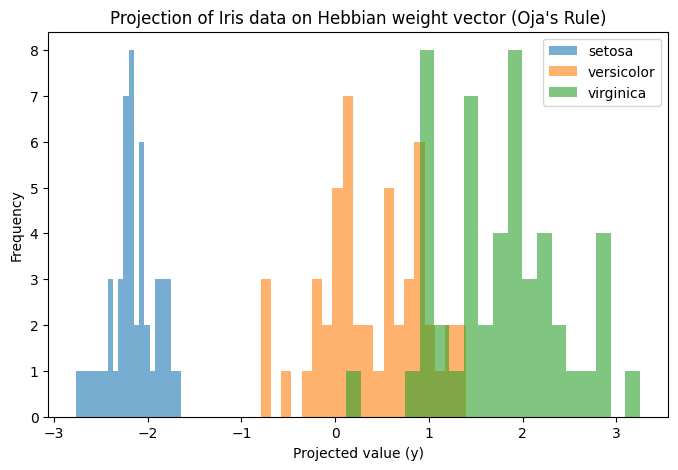

In [ ]:
import matplotlib.pyplot as plt

# Project data onto the learned Hebbian weight direction
y_projection = np.dot(X_scaled, weights)

# Plot projections for each species
plt.figure(figsize=(8,5))
for label in np.unique(y_encoded):
    plt.hist(y_projection[y_encoded == label], bins=20, alpha=0.6, label=encoder.classes_[label])

plt.title("Projection of Iris data on Hebbian weight vector (Oja's Rule)")
plt.xlabel("Projected value (y)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


PCA first-component explained variance ratio: 0.7277
Cosine similarity (oja vs PCA1): 0.9856  (abs: 0.9856)

Note: cosine may be negative if directions are opposite — abs() shows alignment magnitude.



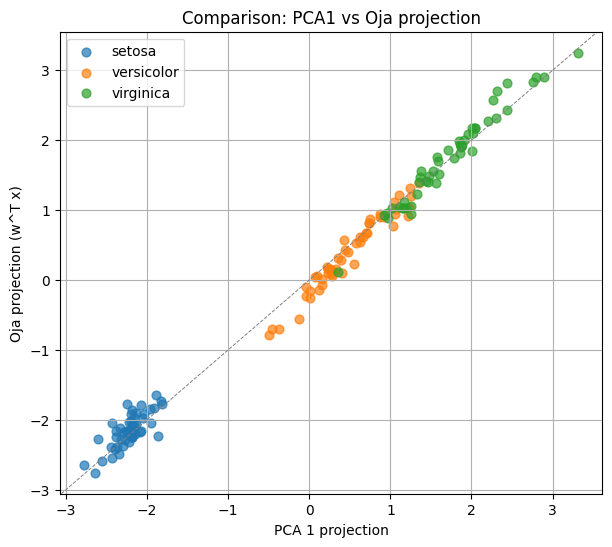

Oja normalized weights: [ 0.5638 -0.1028  0.563   0.5955]
PCA1 normalized vector: [ 0.5224 -0.2634  0.5813  0.5656]


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1) PCA (first principal component)
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_scaled).flatten()          # projection onto PC1
pc1_vector = pca.components_[0]                      # PCA first component (unit vector)
explained_var = pca.explained_variance_ratio_[0]

# 2) Your Oja weights (from previous step)
oja_w = weights.copy()
# normalize both vectors for fair cosine similarity
oja_norm = oja_w / np.linalg.norm(oja_w)
pc1_norm = pc1_vector / np.linalg.norm(pc1_vector)

# 3) Cosine similarity (absolute value close to 1 means alignment up to sign)
cos_sim = np.dot(oja_norm, pc1_norm)
cos_sim_abs = abs(cos_sim)

print(f"PCA first-component explained variance ratio: {explained_var:.4f}")
print(f"Cosine similarity (oja vs PCA1): {cos_sim:.4f}  (abs: {cos_sim_abs:.4f})")
print("\nNote: cosine may be negative if directions are opposite — abs() shows alignment magnitude.\n")

# 4) Scatter plot: Oja projection vs PCA1 projection, colored by species
oja_proj = np.dot(X_scaled, oja_w)
plt.figure(figsize=(7,6))
for label in np.unique(y_encoded):
    plt.scatter(pc1[y_encoded == label], oja_proj[y_encoded == label],
                alpha=0.7, label=encoder.classes_[label], s=40)
plt.xlabel("PCA 1 projection")
plt.ylabel("Oja projection (w^T x)")
plt.title("Comparison: PCA1 vs Oja projection")
plt.legend()
plt.grid(True)
plt.axline((0,0), slope=1, color='gray', linestyle='--', linewidth=0.7)  # y=x reference
plt.show()

# 5) Optional: print normalized vectors for quick inspection
print("Oja normalized weights:", np.round(oja_norm, 4))
print("PCA1 normalized vector:", np.round(pc1_norm, 4))
